# Proyecto 1

### Abner Hernández Rodríguez

In [123]:
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Entrenamiento

Descargamos los datos

In [124]:
train=pd.read_csv('train.csv')
data1=train.copy()
data2=pd.read_csv('test.csv')
data2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Determinamos los datos a predecir para entrenar el modelo

In [125]:
objetivo=data1['SalePrice']

data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Función para determinar las columnas que contienen celdas sin datos (NaN)

In [126]:
def limpia(data):
    L=len(data)
    print('Columnas con valores nulos: ',data.columns[data.isna().any()].tolist())
    v=[]
    for col in data.columns[data.isna().any()].tolist():
        nanes=len(data[data[col].isna() == True][col])
        #Si más del 80% de los datos de la columna son NaN se elimina la columna
        if ((nanes/L)*100) >= 80:
            data.drop(col, axis=1, inplace=True)
            v.append(col)    
    print('Se retiraron: ', v )
    return data
        
data1=limpia(data1)

Columnas con valores nulos:  ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
Se retiraron:  ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


 Se retiran las mismas columnas que en los datos de entrenamiento

In [127]:
data2.drop(['Id','Alley', 'PoolQC', 'Fence', 'MiscFeature'],axis = 1, inplace = True)

Ahora quitamos las columnas que no nos generan información

In [128]:
data1.drop(['Id','SalePrice'],axis=1,inplace=True)
features=data1
print(features.shape)

(1460, 75)


In [129]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

is_string_dtype(data1['Street'])

True

Sustituimos los valores NaN:

Si es una columna de datos numéricos se sustituye el valor con el promedio.

Si es una columna de datos nominales se sustituye el valor con "NoDisp".

In [130]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

def sustitucion_nan(data):
    cont1=0
    cont2=0
    for col in data.columns[data.isna().any()].tolist():
        if is_numeric_dtype(data[col]):
            cont1+=1
            data[col]=data[col].fillna(data[col].mean())
        if is_string_dtype(data[col]):
            cont2+=1
            data[col]=data[col].fillna("NoDisp")
    print('Numéricos=',cont1,'String=',cont2)
    return data


In [131]:
data1=sustitucion_nan(data1)
data1.shape

Numéricos= 3 String= 12


(1460, 75)

In [132]:
data2 = sustitucion_nan(data2)
data2.shape

Numéricos= 11 String= 18


(1459, 75)

Verificamos que ya no hay más celdas con NaN

<AxesSubplot:>

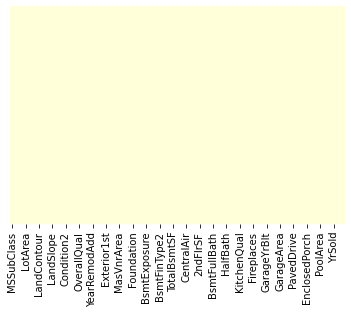

In [133]:
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

<AxesSubplot:>

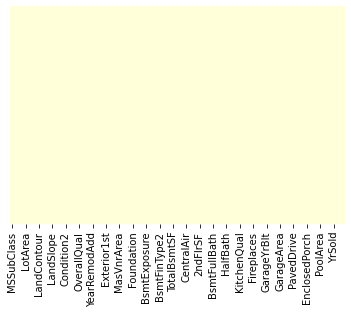

In [134]:
sns.heatmap(data2.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

### Función que enlista y contabiliza las categorías numéricas y nominales

In [135]:
def categorias(data):
    
    num_features = []
    str_features = []
    
    for col in data.columns:
        if is_numeric_dtype(data[col]):
            num_features.append(col)
                
        if is_string_dtype(data[col]):
            str_features.append(col)
    print('Categorias num:',len(num_features),'Categorias str:',len(str_features))        
    return num_features, str_features

In [136]:
cat_num,cat_str=categorias(data1)

Categorias num: 36 Categorias str: 39


In [137]:
cat_num1,cat_str1=categorias(data2)

Categorias num: 36 Categorias str: 39


#### Función que cambia los valores atípicos

Se calculan los percentiles de cada columna, y los valores que 
sean menores al mínimo se cambian al mínimo, de forma análoga 
se cambian los mayores al máximo. También se imprimen las columnas con valores atípicos.

#### Pero se omitió esta función, pues reducía la precisión de las predicciones

In [138]:
def elim_val_at(data,cols):
    aux=pd.DataFrame
    for col in cols:
        q_1, q_3 = np.percentile(data[col], 25), np.percentile(data[col], 75)
        corte=(q_3-q_1)*1.5
        sup, inf = q_1 - corte, q_3 + corte
        datos_sup = data[data[col] > sup]
        datos_inf = data[data[col] < inf]
        
        total = datos_sup.shape[0]+datos_inf.shape[0]
        
        if total != 0 and (sup !=0 and inf!=0):
            print(col)
        
            data[col] = np.where(data[col]>sup, sup, data[col])
            data[col] = np.where(data[col]<inf, inf, data[col])
        
    return data
        

In [139]:
#data1=elim_val_at(data1,cat_num)

In [140]:
cat_str

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

#### Se generan dos listas, uno contiene las columnas cuyos datos tienen un orden y otro cuyas columnas no lo tienen.

In [141]:
ordinal_cat = ['LotShape','LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
               'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
                'FireplaceQu', 'GarageQual', 'GarageCond' , 'Utilities']

nominal_cat = ['MSZoning','Street', 'LotConfig', 'Neighborhood',
               'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl'
                , 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
                'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
                'PavedDrive','SaleType', 'SaleCondition', 'LandContour']


In [142]:
len(ordinal_cat)+len(nominal_cat)

39

#### Ahora un diccionario de los datos con orden. Ordenados de "mejor" a "peor".

In [143]:
ord_dict = {"LotShape": ['Reg','IR1','IR2','IR3', 'NoDisp'],
            "LandSlope" : ["Gtl", "Mod", "Sev",'NoDisp' ],
            "ExterQual": [  "Ex", "Gd", "TA", "Fa", "Po", 'NoDisp' ],
            "ExterCond": [  "Ex", "Gd", "TA", "Fa", "Po", 'NoDisp' ],
            "BsmtQual": [  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NoDisp' ],
            "BsmtCond":[  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NoDisp' ],
            "BsmtExposure": ["Gd", "Av", "Mn", "No", "NA", 'NoDisp'],
            "BsmtFinType1":[ "GLQ","ALQ","BLQ","Rec","LwQ","Unf","NA", 'NoDisp'],
            "BsmtFinType2":[ "GLQ","ALQ","BLQ","Rec","LwQ","Unf","NA", 'NoDisp'],
            "HeatingQC": [  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NoDisp' ],
            "KitchenQual": [  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NoDisp' ],
            "FireplaceQu":[  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NoDisp' ],
            "GarageQual":[  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NoDisp' ],
            "GarageCond": [  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NoDisp' ],
            "Utilities":  [ "AllPub", "NoSewr", "NoSeWa","ELO", "NoDisp"]           
           }

#### Se define una función para codificar los datos no numéricos. Para los que tienen orden se utiliza LabelEncoder(), para los que no, se usa pandas.get_dummies(). Al mismo tiempo se codifican los datos de validación, pues al codificarse de manera independiente se obtienen resultados distintos.

In [144]:
from sklearn.preprocessing import LabelEncoder

def codificar(ord_cat,nom_cat,data,test):
    
    le=LabelEncoder()
    k=0
    for col in ord_cat:
        le.fit(ord_dict[col])
        data[col] = le.transform(data[col])
        if len(test) != 0:
            test[col] = le.transform(test[col])
    for col in nom_cat:
        dum = pd.get_dummies(data[col])
        data = pd.concat([data, dum], axis=1)
        data.drop([col], axis=1, inplace=True)
        if len(test) != 0:
            test = pd.concat([test, dum], axis=1)
            test.drop([col], axis=1, inplace=True)
    if len(test) != 0:
        return data, test
    else:
        return data



In [145]:
print(data1.shape)
print(data2.shape)

(1460, 75)
(1459, 75)


In [146]:
data1,data2=codificar(ordinal_cat,nominal_cat,data1,data2)
print(data1.head(10))
print(data1.shape)
print(data2.shape)

   MSSubClass  LotFrontage  LotArea  LotShape  ...  Bnk  HLS  Low  Lvl
0          60    65.000000     8450         4  ...    0    0    0    1
1          20    80.000000     9600         4  ...    0    0    0    1
2          60    68.000000    11250         0  ...    0    0    0    1
3          70    60.000000     9550         0  ...    0    0    0    1
4          60    84.000000    14260         0  ...    0    0    0    1
5          50    85.000000    14115         0  ...    0    0    0    1
6          20    75.000000    10084         4  ...    0    0    0    1
7          60    70.049958    10382         0  ...    0    0    0    1
8          50    51.000000     6120         4  ...    0    0    0    1
9         190    50.000000     7420         4  ...    0    0    0    1

[10 rows x 228 columns]
(1460, 228)
(1460, 228)


In [147]:
data2 = data2.iloc[:-1, :]
print(data2.shape)
data2


(1459, 228)


,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,...,Maj1,Maj2,Min1,Min2,Mod,Sev,Typ,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,NoDisp,Fin,NoDisp,RFn,Unf,N,P,Y,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial,Bnk,HLS,Low,Lvl
0,20.0,80.0,11622.0,4.0,0.0,0.0,5.0,6.0,1961.0,1961.0,0.0,5.0,5.0,6.0,6.0,4.0,6.0,468.0,3.0,144.0,270.0,882.0,6.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,6.0,5.0,0.0,4.0,1961.000000,1.0,730.0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,20.0,81.0,14267.0,0.0,0.0,0.0,6.0,6.0,1958.0,1958.0,108.0,5.0,5.0,6.0,6.0,4.0,0.0,923.0,7.0,0.0,406.0,1329.0,6.0,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,2.0,6.0,0.0,4.0,1958.000000,1.0,312.0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,60.0,74.0,13830.0,0.0,0.0,0.0,5.0,5.0,1997.0,1998.0,0.0,5.0,5.0,2.0,6.0,4.0,2.0,791.0,7.0,0.0,137.0,928.0,2.0,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,6.0,1.0,6.0,1997.000000,2.0,482.0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,60.0,78.0,9978.0,0.0,0.0,0.0,6.0,6.0,1998.0,1998.0,20.0,5.0,5.0,6.0,6.0,4.0,2.0,602.0,7.0,0.0,324.0,926.0,0.0,926.0,678.0,0.0,1604.0,0.0,0.0,2.0,1.0,3.0,1.0,2.0,7.0,1.0,2.0,1998.000000,2.0,470.0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
4,120.0,43.0,5005.0,0.0,0.0,0.0,8.0,5.0,1992.0,1992.0,0.0,2.0,5.0,2.0,6.0,4.0,0.0,263.0,7.0,0.0,1017.0,1280.0,0.0,1280.0,0.0,0.0,1280.0,0.0,0.0,2.0,0.0,2.0,1.0,2.0,5.0,0.0,4.0,1992.000000,2.0,506.0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,21.0,1936.0,4.0,0.0,0.0,4.0,7.0,1970.0,1970.0,0.0,5.0,5.0,6.0,6.0,4.0,7.0,0.0,7.0,0.0,546.0,546.0,2.0,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,5.0,0.0,4.0,1977.721217,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1455,160.0,21.0,1894.0,4.0,0.0,0.0,4.0,5.0,1970.0,1970.0,0.0,5.0,5.0,6.0,6.0,4.0,6.0,252.0,7.0,0.0,294.0,546.0,6.0,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,6.0,0.0,4.0,1970.000000,1.0,286.0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1456,20.0,160.0,20000.0,4.0,0.0,0.0,5.0,7.0,1960.0,1996.0,0.0,5.0,5.0,6.0,6.0,4.0,0.0,1224.0,7.0,0.0,0.0,1224.0,0.0,1224.0,0.0,0.0,1224.0,1.0,0.0,1.0,0.0,4.0,1.0,6.0,7.0,1.0,6.0,1960.000000,2.0,576.0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1457,85.0,62.0,10441.0,4.0,0.0,0.0,5.0,5.0,1992.0,1992.0,0.0,5.0,5.0,2.0,6.0,0.0,2.0,337.0,7.0,0.0,575.0,912.0,6.0,970.0,0.0,0.0,970.0,0.0,1.0,1.0,0.0,3.0,1.0,6.0,6.0,0.0,4.0,1977.721217,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


# En los siguientes modelos de predicción se evalua la precisión del modelo de acuerdo al índice de Jaccarrd o a la métrica de Hamming (Hamming_loss)


https://en.wikipedia.org/wiki/Multi-label_classification

## Regresión lineal

In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

scal = ('Scaler', StandardScaler())

reg = Pipeline([scal,('Regresion',LinearRegression())])

reg.fit(data1,objetivo)

y1=reg.predict(data1)

Puntuación

In [149]:
reg.score(data1,objetivo)

0.9160917343498275

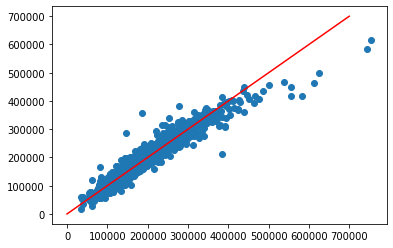

In [150]:
plt.scatter(objetivo,y1)
#plt.scatter(objetivo,objetivo)
plt.plot(range(0,700000),range(0,700000),'r-')
plt.show()


## Regresor de aumento de gradiente

In [151]:
from sklearn.ensemble import GradientBoostingRegressor

pip = Pipeline([scal,('GradientBoosting',GradientBoostingRegressor())])

In [152]:
pip.fit(data1,objetivo)
y2 = pip.predict(data1)

Puntuación

In [153]:
pip.score(data1,objetivo)

0.9670609538670771

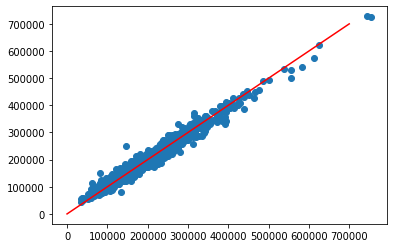

In [154]:
plt.scatter(objetivo,y2)
#plt.scatter(objetivo,objetivo)
plt.plot(range(0,700000),range(0,700000),'r-')
plt.show()

# Prueba

In [155]:
yt1 = reg.predict(data2)

In [156]:
print(yt1)

[105525.33053999 168625.33053999 170669.33053999 ... 153369.33053999
 130029.33053999 263413.33053999]


In [157]:
yt2=pip.predict(data2)

In [158]:
print(yt2)

[125214.80225209 162139.86632123 177265.8178742  ... 166108.1374032
 137098.50849551 234841.22949612]


El archivo fue subido y calificado en Kaggle, obteniendo una puntuación de 0.15861

In [159]:
""" submission = pd.DataFrame(columns=['Id', 'SalePrice'])
    data2=pd.read_csv('test.csv')
    submission['Id'] = data2['Id']
    submission['SalePrice'] = yt2

    submission.to_csv('submission.csv', index=False) """

" submission = pd.DataFrame(columns=['Id', 'SalePrice'])\n    data2=pd.read_csv('test.csv')\n    submission['Id'] = data2['Id']\n    submission['SalePrice'] = yt2\n\n    submission.to_csv('submission.csv', index=False) "